# Topic Modelling

* Topic modeling is a type of statistical modeling that uses unsupervised Machine Learning to identify clusters or groups of similar words within a body of text. 
* This text mining method uses semantic structures in text to understand unstructured data without predefined tags or training data.

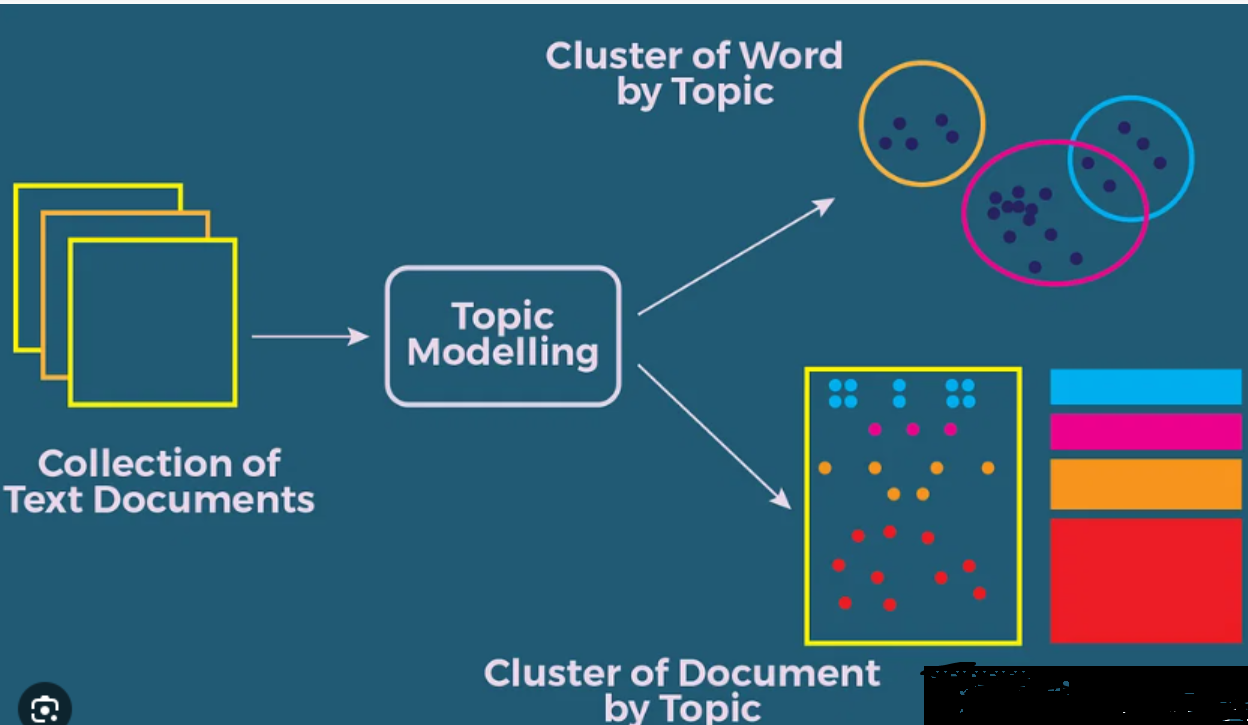

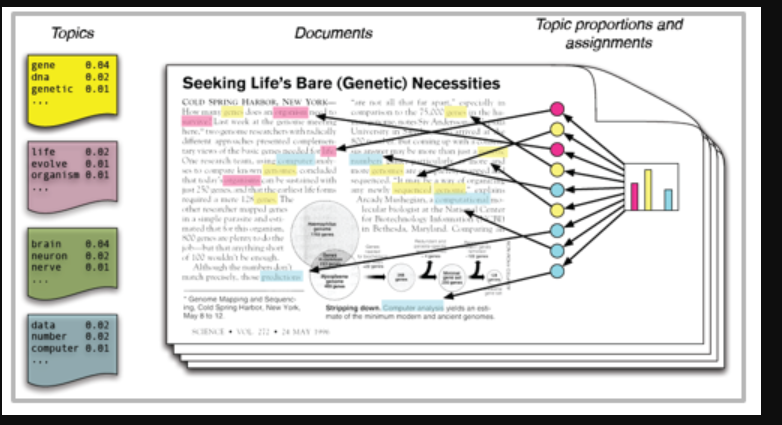

https://monkeylearn.com/blog/introduction-to-topic-modeling/

=========================================================================================================

## Usecase - Topics in the Customer Reviews

In [28]:
import pandas as pd

from top2vec import Top2Vec


pip install top2vec


#if that fails try install VS C++ --- Microsoft C++ Build Tools https://visualstudio.microsoft.com/visual-cpp-build-tools/


then restart the computer and try to pip install again  -- pip install top2vec

#alternate option ---->>> conda install -c conda-forge hdbscan

======================================================================================================

TypeError: Descriptors cannot not be created directly.
If this call came from a _pb2.py file, your generated code is out of date and must be regenerated with protoc >= 3.19.0.
If you cannot immediately regenerate your protos, some other possible workarounds are:
 1. Downgrade the protobuf package to 3.20.x or lower.
 2. Set PROTOCOL_BUFFERS_PYTHON_IMPLEMENTATION=python (but this will use pure-Python parsing and will be much slower).

pip uninstall protobuf

pip install protobuf==3.20.*


In [4]:

file_path = "McDonalds-Yelp-Sentiment-DFE.csv"

df = pd.read_csv(
    file_path,
    usecols=["_unit_id", "city", "review"],
    encoding="unicode_escape",
)


In [5]:
df.head()


,_unit_id,city,review
0,679455653,Atlanta,"I'm not a huge mcds lover, but I've been to be..."
1,679455654,Atlanta,Terrible customer service. Î¾I came in at 9:30...
2,679455655,Atlanta,"First they ""lost"" my order, actually they gave..."
3,679455656,Atlanta,I see I'm not the only one giving 1 star. Only...
4,679455657,Atlanta,"Well, it's McDonald's, so you know what the fo..."


In [20]:
df.size

4575

In [6]:
docs_bad = df["review"].values.tolist()


In [29]:
docs_bad



["I'm not a huge mcds lover, but I've been to better ones. This is by far the worst one I've ever been too! It's filthy inside and if you get drive through they completely screw up your order every time! The staff is terribly unfriendly and nobody seems to care.",
 'Terrible customer service. Î¾I came in at 9:30pm and stood in front of the register and no one bothered to say anything or help me for 5 minutes. Î¾There was no one else waiting for their food inside either, just outside at the window. Î¾ I left and went to Chickfila next door and was greeted before I was all the way inside. This McDonalds is also dirty, the floor was covered with dropped food. Obviously filled with surly and unhappy workers.',
 'First they "lost" my order, actually they gave it to someone one else than took 20 minutes to figure out why I was still waiting for my order.They after I was asked what I needed I replied, "my order".They asked for my ticket and the asst mgr looked at the ticket then incompletely 

In [31]:
??Top2Vec

I got an error "error: Microsoft Visual C++ 14.0 or greater is required. Get it with "Microsoft C++ Build Tools": https://visualstudio.microsoft.com/visual-cpp-build-tools/
      [end of output]"


In [33]:
from gensim.models.phrases import Phrases, ENGLISH_CONNECTOR_WORDS
??Phrases

In [8]:
topic_model = Top2Vec(
    docs_bad,
    embedding_model="universal-sentence-encoder", #pip install top2vec[sentence_encoders] #BERT-EMBEDDINGS
    #speed="deep-learn",
    #tokenizer=tok,
    ngram_vocab=True,
    ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"},
)

2023-05-28 19:40:46,477 - top2vec - INFO - Pre-processing documents for training
C:\Users\admin\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(
2023-05-28 19:40:47,335 - top2vec - INFO - Downloading universal-sentence-encoder model
2023-05-28 19:43:45,732 - top2vec - INFO - Creating joint document/word embedding
INFO:top2vec:Creating joint document/word embedding
2023-05-28 19:43:50,280 - top2vec - INFO - Creating lower dimension embedding of documents
INFO:top2vec:Creating lower dimension embedding of documents
2023-05-28 19:44:18,190 - top2vec - INFO - Finding dense areas of documents
INFO:top2vec:Finding dense areas of documents
2023-05-28 19:44:18,285 - top2vec - INFO - Finding topics
INFO:top2vec:Finding topics


DIM REDUNCTION -- UMAP 

https://guardiancoder.com/2022/08/15/dimensionality-reduction/


2 or 3 dim space

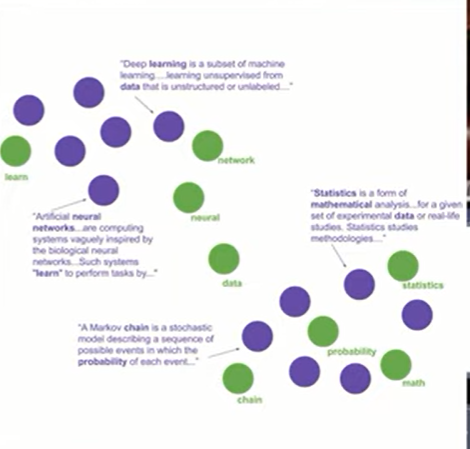

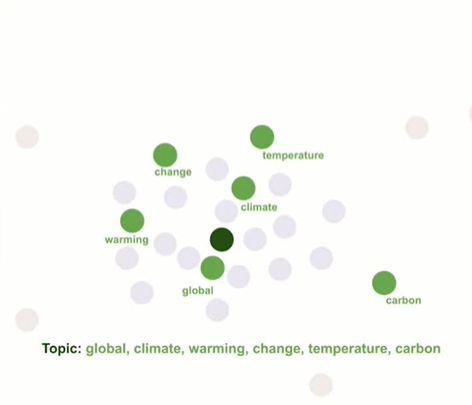

The code snippet you provided is using the Top2Vec library to create a topic model. Let's break it down:

Top2Vec: This is a Python library used for topic modeling and document clustering. It is designed to automatically discover topics from a collection of documents.

docs_bad: This is the input data for the topic model. It represents a collection of documents that you want to analyze and extract topics from.

embedding_model="universal-sentence-encoder": This parameter specifies the type of embedding model to be used for representing the documents. In this case, the Universal Sentence Encoder model is chosen. The Universal Sentence Encoder is a pre-trained model that converts sentences or short paragraphs into dense vector representations, capturing semantic meaning.

speed="deep-learn": This parameter determines the speed of the topic modeling algorithm. "deep-learn" indicates that a slower, but more accurate, algorithm will be used.

ngram_vocab=True: This parameter enables the extraction of multi-word phrases as part of the vocabulary. For example, instead of treating "New York" as separate words, it would be treated as a single phrase.

ngram_vocab_args={"connector_words": "phrases.ENGLISH_CONNECTOR_WORDS"}: This parameter specifies the set of connector words to be used for extracting multi-word phrases. In this case, the English connector words from the phrases module are used.

Overall, this code initializes a topic model using the Top2Vec library, specifying the input documents, embedding model, algorithm speed, and options for handling multi-word phrases. The resulting model can be used to extract topics from the document collection.

ImportError: universal-sentence-encoder is not available.

Try: pip install top2vec[sentence_encoders]

Alternatively try: pip install tensorflow tensorflow_hub tensorflow_text

In [34]:

topic_model.get_num_topics() #3


2

In [17]:
??topic_model.get_topic_sizes

In [16]:
topic_model.get_topic_sizes()


(array([1433,   92], dtype=int64), array([0, 1], dtype=int64))

In [22]:
1433 + 92

1525

In [21]:
df.size

4575

  The number of documents most similar to each topic. Topics are
        in increasing order of size.

In [36]:
topic_model.get_topics()

(array([['worst mcdonalds', 'mcdonalds', 'mc donalds', 'drive thru',
         'worst mcdonald', 'fast food', 'mcd', 'mcdonald', 'drive thrus',
         'burger king', 'mcchicken sandwich', 'chicken mcnuggets',
         'mcdonald standards', 'egg mcmuffin', 'particular mcdonald',
         'my order', 'medium fries', 'cold fries', 'happy meal',
         'big mac', 'fries were', 'spicy mcchicken', 'poor service',
         'fries', 'terrible customer', 'chicken sandwich', 'menu items',
         'drive through', 'large fries', 'big macs', 'french fry',
         'order right', 'burger', 'french fries', 'menu',
         'chicken nuggets', 'slow service', 'order wrong',
         'horrible service', 'double cheeseburger', 'dollar menu',
         'quarter pounder', 'costumer service', 'hash browns',
         'your order', 'happy meals', 'customer service', 'order',
         'mc donald', 'kids meal'],
        ['iced coffee', 'hot coffee', 'coffee', 'than starbucks', 'iced',
         'an iced', 'd

In [37]:
topic_words, word_scores, topic_nums = topic_model.get_topics(1)


In [38]:
topic_words

array([['worst mcdonalds', 'mcdonalds', 'mc donalds', 'drive thru',
        'worst mcdonald', 'fast food', 'mcd', 'mcdonald', 'drive thrus',
        'burger king', 'mcchicken sandwich', 'chicken mcnuggets',
        'mcdonald standards', 'egg mcmuffin', 'particular mcdonald',
        'my order', 'medium fries', 'cold fries', 'happy meal',
        'big mac', 'fries were', 'spicy mcchicken', 'poor service',
        'fries', 'terrible customer', 'chicken sandwich', 'menu items',
        'drive through', 'large fries', 'big macs', 'french fry',
        'order right', 'burger', 'french fries', 'menu',
        'chicken nuggets', 'slow service', 'order wrong',
        'horrible service', 'double cheeseburger', 'dollar menu',
        'quarter pounder', 'costumer service', 'hash browns',
        'your order', 'happy meals', 'customer service', 'order',
        'mc donald', 'kids meal']], dtype='<U19')

In [39]:
word_scores

array([[0.45509854, 0.42823625, 0.42334598, 0.4168632 , 0.41538882,
        0.407187  , 0.40217102, 0.4014364 , 0.37032253, 0.36631066,
        0.36587995, 0.3641925 , 0.36217156, 0.3612571 , 0.35891187,
        0.35261545, 0.34722614, 0.34691226, 0.34474868, 0.34393156,
        0.34078616, 0.34020758, 0.3364214 , 0.33044076, 0.32049888,
        0.32042137, 0.3193525 , 0.3181131 , 0.31736207, 0.31409115,
        0.3100178 , 0.30982828, 0.30837157, 0.30439523, 0.30017444,
        0.2987194 , 0.2963482 , 0.29570428, 0.29393485, 0.29174638,
        0.2885556 , 0.28729832, 0.28362644, 0.28252953, 0.2810255 ,
        0.27671236, 0.27444258, 0.27285153, 0.26389188, 0.25797045]],
      dtype=float32)

In [15]:
topic_nums

array([0, 1])

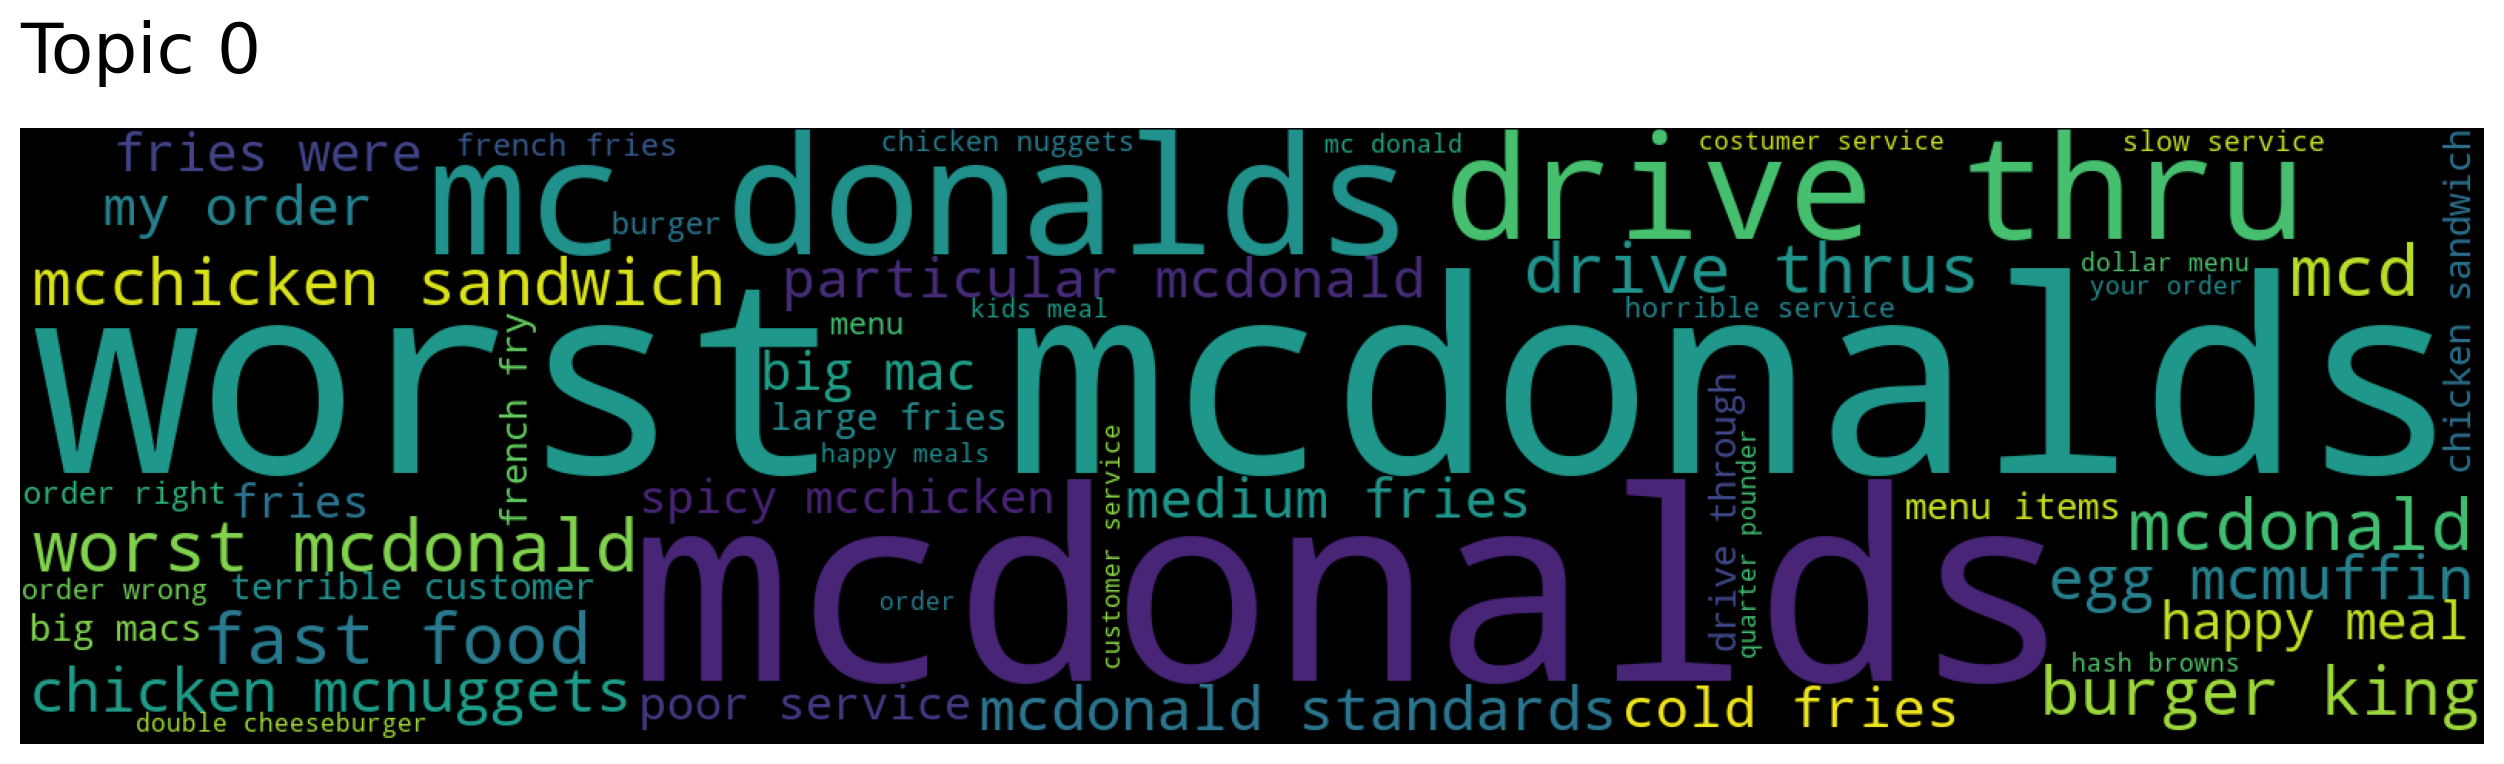

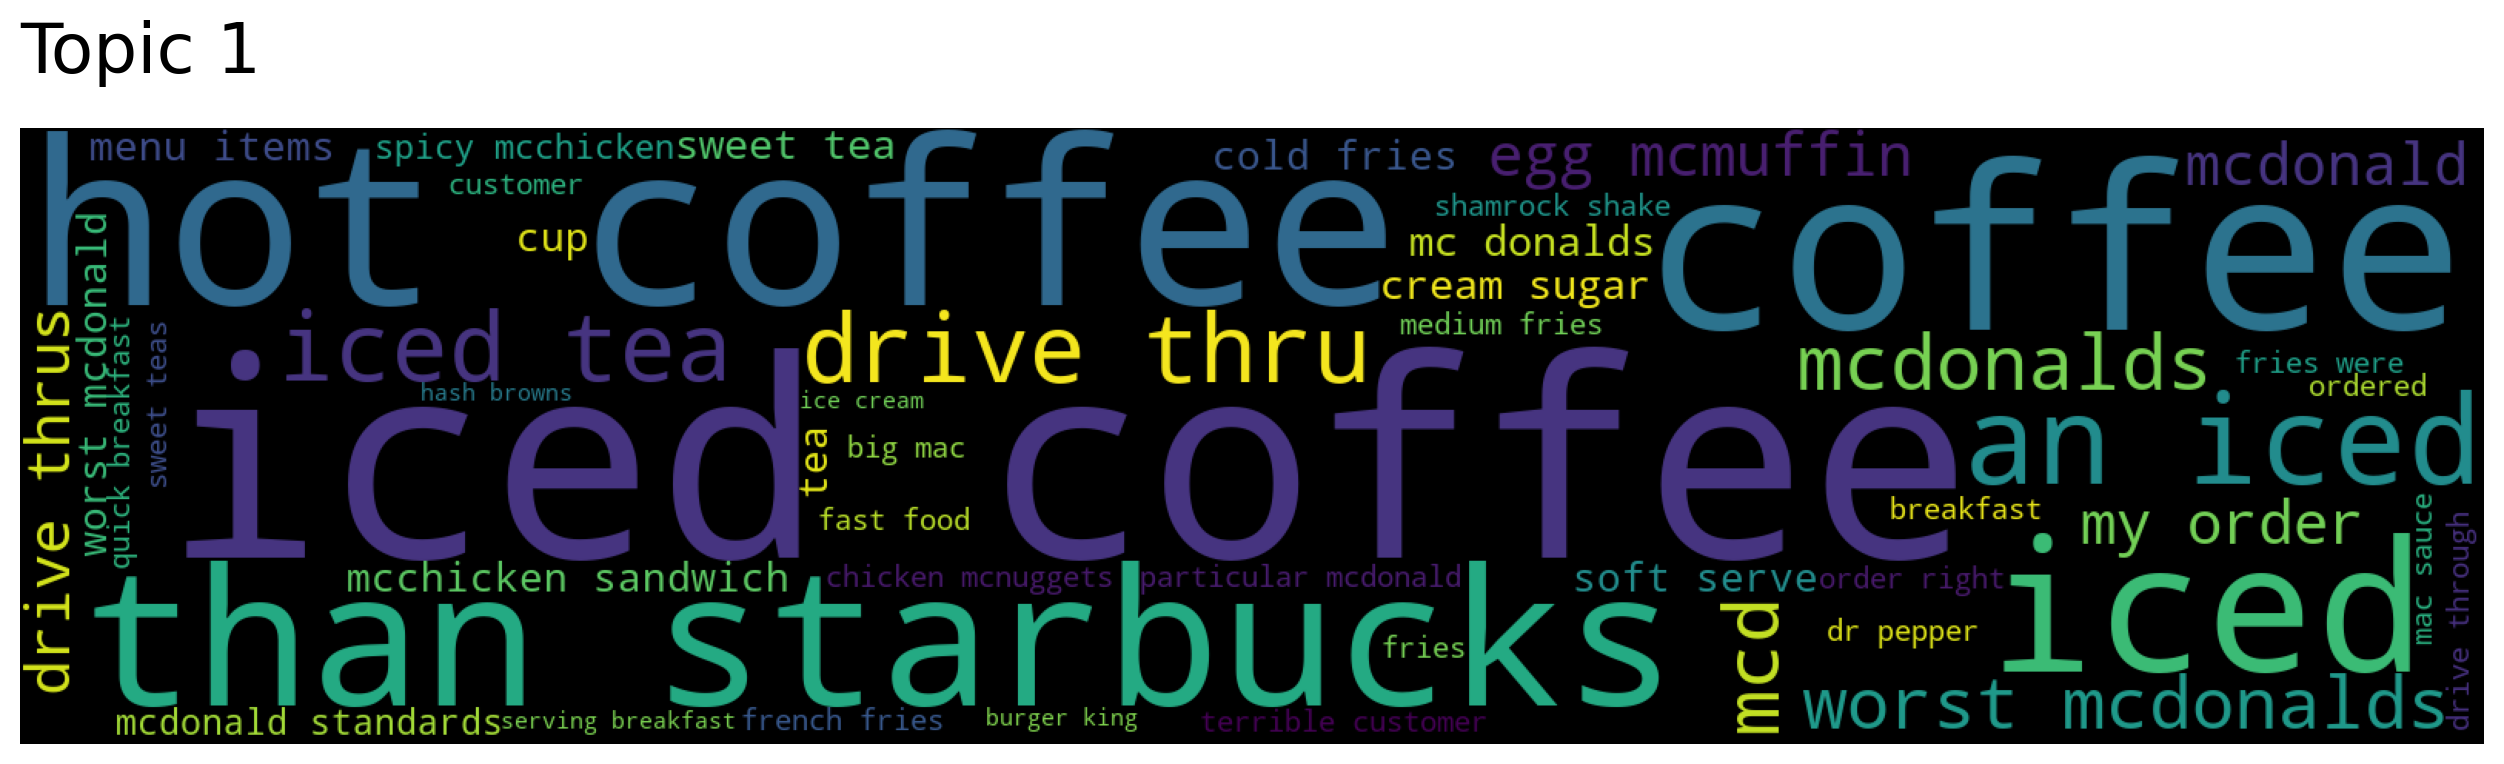

In [12]:


for topic in topic_nums:
    topic_model.generate_topic_wordcloud(topic)

In [46]:
 #documents, document_scores, document_ids=
    
topic_model.search_documents_by_topic(topic_num=1, num_docs=2)


(array(['First of all...this location takes FOREVER! I came in for a simple iced coffee. Î¾Asked for a splash of cream and no sugar...cashier looked at me like I had 3 heads. Î¾Didn\'t realize that was such a diva request?! Î¾Then the girl making the coffee had to double check what I was asking for...seriously?!? And these workers think they deserve more $$! Î¾Sadly I like McDonald\'s coffee way better than Starbucks..but a simple request is asking them for too much. Î¾Good coffee. Î¾Horrible service. A plain iced coffee should not take 20 minutes, especially when there are only 2 people ahead of you. Î¾Oh, and I forgot to mention my "splash" of cream looks like they dumped the whole damn bottle in there..looks more like a splash of coffee. Î¾See pic!',
        "Finally left early enough for work to allow me to get a McD's coffee. I don't like the fancy coffees, just regular coffee with cream. I decided to be quick, avoid the drive-thru and go inside. My luck there was one person ahead

In [ ]:
documents, document_scores, document_ids= topic_model.search_documents_by_topic(topic_num=0, num_docs=1)


In [48]:
topic_model.search_documents_by_keywords(keywords=["drive thru"], num_docs=10)



(array(['No drive through :-/',
        "Hey it's a cup of coffee from the drive thru!",
        "It's McDonald's. It has a drive-thru. We drove through it. The frappe produced from said drive-thru was A-OK.",
        "I didn't like their drive thru service.",
        "This place is like any other MCD's locations. The drive thru is pretty quick and my order was ready as I pulled up to the 2nd window after paying. Exactly how a drive thru should be!",
        'I have not had the same bad luck as other Yelpers here. Î¾The drive thru is quick and the people kids working the windows always specifically say "We appreciate your business." Doesn\'t feel as smug as a Chikfila worker when they say it.They offer two order lines in the drive thru and additional waiting areas for people with large orders. Keeps the traffic moving.Pretty easy to get in and out, and an efficient drive thru is about all you can ask from a McDonald\'s.',
        "A McD's in a kinda sketchy area. Î¾I've been through th

In [26]:
(
    documents,
    document_scores,
    document_ids,
) = 

In [27]:

for doc, score, doc_id in zip(documents, document_scores, document_ids):
    print(f"Document: {doc_id}, Score: {score}")
    print("-----------")
    print(doc)
    print("-----------")
    print()

Document: 930, Score: 0.4194742630586162
-----------
No drive through :-/
-----------

Document: 181, Score: 0.366240739222982
-----------
Awful service and extremely slow. Go elsewhere.
-----------

Document: 367, Score: 0.3200532557948701
-----------
No Hot Mustard :(
-----------

Document: 320, Score: 0.2995406036428315
-----------
fast, Î¾a little toooo fast
-----------

Document: 214, Score: 0.29835545707014605
-----------
Terrible service, plain and simple!
-----------

